# 2 - Exploratory Data Analysis

After cleaning Data explore Data is so important to see what is going on. 

At this stage, we will have visualized the data. This will reveal whether an additional data cleaning step is required or not. 

At the working with numerical Data it is important to make some statistical analysis about Data. In this project by using some machine learning (ML) techniques., i'm going to examine **Most common words** and **Size of Vocabulary** for each speech of presidents.

In [1]:
# Read in the words matrix
import pandas as pd
data = pd.read_csv('data_words.csv', index_col=[0])
data = data.transpose() # in order to have presidents names as column headers.
data.head()

,Erdogan,Macron,Merkel,Nicolas_Maduro,Obama,Putin,Trudeau,Trump,Xi_Jinping,Yoshihide_Suga
abdullah,0,1,0,0,0,0,0,0,0,0
abe,0,0,0,0,0,0,1,0,0,3
ability,0,0,0,0,1,2,0,0,0,1
abkhazians,1,0,0,0,0,0,0,0,0,0
able,0,3,2,0,0,3,0,0,0,0


In [2]:
# Find the top 30 words said by each leader.
most_words = {}
for w in data.columns:
    max_30 = data[w].sort_values(ascending=False).head(30)
    most_words[w]= list(zip(max_30.index, max_30.values))

most_words

{'Erdogan': [('people', 22),
  ('turkey', 17),
  ('politics', 17),
  ('today', 15),
  ('lost', 13),
  ('said', 12),
  ('brothers', 10),
  ('nation', 10),
  ('party', 9),
  ('won', 9),
  ('god', 8),
  ('opposition', 8),
  ('victory', 8),
  ('thank', 8),
  ('thanking', 7),
  ('world', 6),
  ('did', 6),
  ('ballot', 6),
  ('say', 6),
  ('democracy', 5),
  ('great', 5),
  ('country', 5),
  ('chaos', 5),
  ('turkeys', 5),
  ('box', 5),
  ('know', 4),
  ('flag', 4),
  ('message', 4),
  ('gave', 4),
  ('million', 4)],
 'Macron': [('courage', 12),
  ('peace', 11),
  ('region', 9),
  ('iran', 8),
  ('build', 7),
  ('need', 7),
  ('commitment', 7),
  ('people', 6),
  ('respect', 6),
  ('time', 6),
  ('got', 6),
  ('tensions', 6),
  ('cooperation', 6),
  ('sahel', 6),
  ('believe', 6),
  ('world', 5),
  ('agreement', 5),
  ('security', 5),
  ('multilateralism', 5),
  ('lasting', 5),
  ('know', 5),
  ('new', 5),
  ('summit', 5),
  ('climate', 5),
  ('challenges', 5),
  ('solution', 4),
  ('syria',

In [3]:
# Print the top 10 words said by each president
for president, top_words in most_words.items():
    print(president)
    print(', '.join([word for word, count in top_words[0:9]]))
    print('---')

Erdogan
people, turkey, politics, today, lost, said, brothers, nation, party
---
Macron
courage, peace, region, iran, build, need, commitment, people, respect
---
Merkel
european, europe, solidarity, europeans, community, years, world, means, member
---
Nicolas_Maduro
venezuela, world, united, nations, states, international, people, country, america
---
Obama
new, nation, people, today, work, time, america, generation, know
---
Putin
life, people, russia, development, years, new, need, country, expectancy
---
Trudeau
women, canada, change, work, equal, economic, people, gender, benefit
---
Trump
american, new, country, border, tonight, years, just, congress, states
---
Xi_Jinping
china, africa, cooperation, african, development, countries, people, chinaafrica, community
---
Yoshihide_Suga
japan, asean, cooperation, japanese, economic, human, countries, supply, connectivity
---


In [4]:
# Look at the most common top words --> add them to the stop word list
from collections import Counter

# Let's first pull out the top 30 words for each comedian
words = []
for president in data.columns:
    top = [word for (word, count) in most_words[president]]
    for t in top:
        words.append(t)
        
words

['people',
 'turkey',
 'politics',
 'today',
 'lost',
 'said',
 'brothers',
 'nation',
 'party',
 'won',
 'god',
 'opposition',
 'victory',
 'thank',
 'thanking',
 'world',
 'did',
 'ballot',
 'say',
 'democracy',
 'great',
 'country',
 'chaos',
 'turkeys',
 'box',
 'know',
 'flag',
 'message',
 'gave',
 'million',
 'courage',
 'peace',
 'region',
 'iran',
 'build',
 'need',
 'commitment',
 'people',
 'respect',
 'time',
 'got',
 'tensions',
 'cooperation',
 'sahel',
 'believe',
 'world',
 'agreement',
 'security',
 'multilateralism',
 'lasting',
 'know',
 'new',
 'summit',
 'climate',
 'challenges',
 'solution',
 'syria',
 'capacity',
 'goals',
 'way',
 'european',
 'europe',
 'solidarity',
 'europeans',
 'community',
 'years',
 'world',
 'means',
 'member',
 'union',
 'united',
 'tolerance',
 'countries',
 'interests',
 'single',
 'time',
 'states',
 'economic',
 'value',
 'taking',
 'eu',
 'germany',
 'policy',
 'fundamental',
 'help',
 'ladies',
 'country',
 'example',
 'gentlemen'

In [5]:
# Let's aggregate this list and identify the most common words along with how many routines they occur in
Counter(words).most_common()

[('people', 8),
 ('world', 8),
 ('new', 6),
 ('country', 5),
 ('time', 5),
 ('years', 5),
 ('economic', 5),
 ('today', 4),
 ('know', 4),
 ('peace', 3),
 ('region', 3),
 ('need', 3),
 ('cooperation', 3),
 ('united', 3),
 ('countries', 3),
 ('states', 3),
 ('times', 3),
 ('america', 3),
 ('development', 3),
 ('politics', 2),
 ('nation', 2),
 ('million', 2),
 ('build', 2),
 ('challenges', 2),
 ('community', 2),
 ('interests', 2),
 ('nations', 2),
 ('international', 2),
 ('work', 2),
 ('common', 2),
 ('women', 2),
 ('americans', 2),
 ('economy', 2),
 ('men', 2),
 ('citizens', 2),
 ('future', 2),
 ('make', 2),
 ('living', 2),
 ('just', 2),
 ('companies', 2),
 ('growth', 2),
 ('year', 2),
 ('support', 2),
 ('turkey', 1),
 ('lost', 1),
 ('said', 1),
 ('brothers', 1),
 ('party', 1),
 ('won', 1),
 ('god', 1),
 ('opposition', 1),
 ('victory', 1),
 ('thank', 1),
 ('thanking', 1),
 ('did', 1),
 ('ballot', 1),
 ('say', 1),
 ('democracy', 1),
 ('great', 1),
 ('chaos', 1),
 ('turkeys', 1),
 ('box', 1

In [6]:
# !pip install wordcloud # first install wordcloud

In [13]:
# Let's make some word clouds from speeches.
from wordcloud import WordCloud, STOPWORDS

stop_words = ["will"] + list(STOPWORDS)

wc = WordCloud(stopwords=stop_words, background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42)


In [14]:
data_cleaned = pd.read_csv('corpus.csv', index_col=[0])

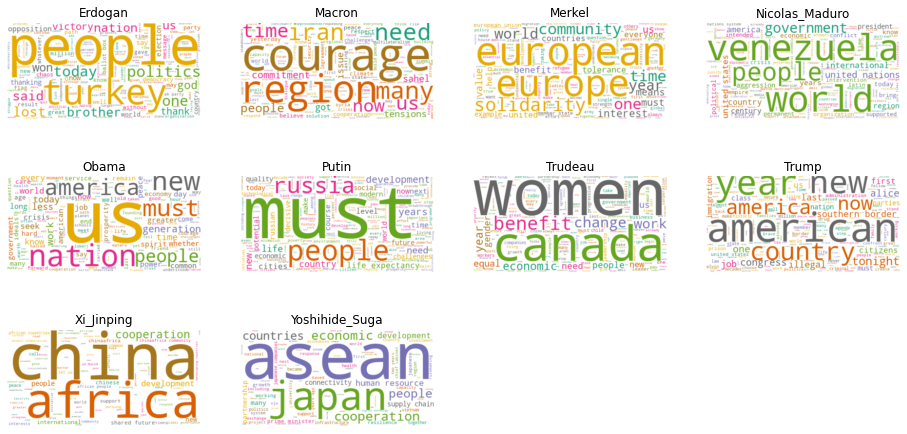

In [15]:
# Reset the output dimensions
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [16, 8]


# Create subplots for each comedian
for index, president in enumerate(data.columns):
    wc.generate(data_cleaned.speeches[president])

    
    plt.subplot(3, 4, index+1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(president)
    
plt.show()

## Observations 



#### Except Merkel and Macron, all other leaders have their own countries names in their word clouds.


***

In [16]:
# Find the number of unique words in that each president uses in 1000 words.

# Identify the non-zero items in the document-term matrix, meaning that the word occurs at least once
unique_list = []
presidents = []

for president in data.columns:
    uniques = data[president].to_numpy().nonzero()[0].size
    unique_list.append(uniques)
    presidents.append(president)

# Create a new dataframe that contains this unique word count
data_words = pd.DataFrame(list(zip(presidents, unique_list)), columns=['president', 'unique_words'])
data_unique_sort = data_words.sort_values(by='unique_words')
data_unique_sort

,president,unique_words
0,Erdogan,470
3,Nicolas_Maduro,511
2,Merkel,537
8,Xi_Jinping,539
1,Macron,547
6,Trudeau,588
5,Putin,593
9,Yoshihide_Suga,597
7,Trump,653
4,Obama,655


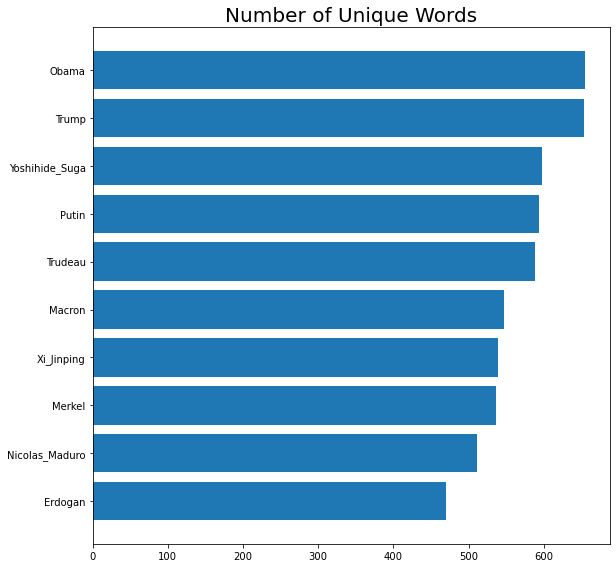

In [17]:
# Let's plot our findings
import numpy as np

y_pos = np.arange(len(data_words))

plt.subplot(1, 2, 1)
plt.barh(y_pos, data_unique_sort.unique_words, align='center')
plt.yticks(y_pos, data_unique_sort.president)
plt.title('Number of Unique Words', fontsize=20)

plt.tight_layout()
plt.show()

## Observation 


### Obama  used the most different words out of nearly two thousand words. 

### Erdogan is the leader who uses the least different words.

***